# Imports

In [54]:
import warnings
warnings.filterwarnings("ignore")

# 1. Подготовка и анализ данных

In [55]:
df = pd.read_csv("data/data.csv")
df

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,2020-01-25,VIRTUS.PRO,CLOUD9,0,2,19,17,0.500000,0.500000,t2,...,0.67,0.11,0.80,0.95,0.681,0.121,0.130481,0.444,False,0.777778
3783,2020-01-24,HEROIC,MAD LIONS,10,16,16,18,0.333333,0.666667,t2,...,0.65,0.08,0.64,0.80,0.811,0.082,0.095975,0.250,False,0.625000
3784,2020-01-19,HEROIC,FORZE,0,2,16,13,0.857143,0.142857,t2,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677
3785,2020-01-19,CR4ZY,FORZE,0,2,20,13,0.538462,0.461538,t2,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677


## Описание датасета

**Общая информация о матче**

`match_date`: 
Дата проведения матча.

`team_1,` `team_2`: 
Названия команд, участвующих в матче.

`t1_points`, `t2_points`: 
Количество очков, набранных командой 1 и командой 2 в матче (например, количество выигранных раундов).

`t1_world_rank`, `t2_world_rank`
Мировой рейтинг команд на момент матча (чем меньше число, тем выше позиция).

`t1_h2h_win_perc`, `t2_h2h_win_perc`
Процент побед команды 1/команды 2 в очных исторических встречах (Head-to-Head).

`winner`
Команда, победившая в матче.

---

**Статистика игроков**
Для каждого игрока (player1–player5) в обеих командах (team_1 и team_2) указаны следующие показатели.

Шаблон названия столбца: `t[1/2]_player[1-5]_[метрика]`.

**Основные показатели**

`rating`
Общий рейтинг игрока, рассчитываемый на основе эффективности (убийства, смерти, полезность и т.д.).

`impact`
Влияние игрока на ключевые моменты матча (учитывает мультиубийства, первые убийства в раунде и т.д.).

`kdr (Kill/Death Ratio)`
Соотношение убийств к смертям.

`dmr (Damage per Round)`
Средний урон, наносимый игроком за раунд.

`kpr (Kills per Round)`
Среднее количество убийств за раунд.

`apr (Assists per Round)`
Среднее количество ассистов (помощь в убийстве) за раунд.

`dpr (Deaths per Round)`
Среднее количество смертей за раунд.

`spr (Survival per Round)`
Процент раундов, в которых игрок выжил.


**Специфические метрики**

`opk_ratio (Opening Kill Ratio)`
Соотношение первых убийств в раунде к попыткам совершить их.

`opk_rating`
Рейтинг эффективности игрока в совершении первых убийств (учитывает успешность и влияние на исход раунда).

`wins_perc_after_fk`
Процент раундов, выигранных командой после того, как игрок совершил первое убийство.

`fk_perc_in_wins`
Процент первых убийств игрока в выигранных командой раундах.

`multikill_perc`
Процент раундов, в которых игрок совершил 2+ убийства (мультиубийства).

`rating_at_least_one_perc`
Процент раундов, где рейтинг игрока был ≥ 1.0.

`is_sniper`
Признак того, что игрок чаще использует снайперские винтовки (1 — да, 0 — нет).

`clutch_win_perc`
Процент выигранных игроком клатч-ситуаций (1vsX, где X ≥ 2).

**Примечание**
Для каждой команды (team_1 и team_2) приведены данные для 5 игроков (player1–player5).



## Подготовка данных

### Чистка

#### Пропуски

In [56]:
missing_values = df.isnull().sum()[df.isnull().sum() > 0]
missing_values

t1_player5_wins_perc_after_fk    2
t2_player3_wins_perc_after_fk    1
t2_player5_wins_perc_after_fk    1
dtype: int64

In [57]:
df[missing_values.index]

,t1_player5_wins_perc_after_fk,t2_player3_wins_perc_after_fk,t2_player5_wins_perc_after_fk
0,0.818,0.737,0.733
1,0.723,0.716,0.739
2,0.747,0.799,0.723
3,0.778,0.716,0.739
4,0.736,0.737,0.733
...,...,...,...
3782,0.750,0.788,0.681
3783,0.788,0.749,0.811
3784,0.782,0.713,0.747
3785,0.705,0.713,0.747


In [58]:
for col in missing_values.index:
    df[col].fillna(df[col].median(), inplace=True)

In [59]:
df[missing_values.index]

,t1_player5_wins_perc_after_fk,t2_player3_wins_perc_after_fk,t2_player5_wins_perc_after_fk
0,0.818,0.737,0.733
1,0.723,0.716,0.739
2,0.747,0.799,0.723
3,0.778,0.716,0.739
4,0.736,0.737,0.733
...,...,...,...
3782,0.750,0.788,0.681
3783,0.788,0.749,0.811
3784,0.782,0.713,0.747
3785,0.705,0.713,0.747


In [60]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

Успешно заменили пропущенные значения на медиану

#### Дубликаты

In [61]:
len(df[df.duplicated()].index)

0

Дубликатов нет

### Обработка форматов

In [62]:
non_numeric_columns = df.select_dtypes(
    exclude=["int64", "float64", "number", "bool"]
).columns
non_numeric_columns  # Столбцы, которые надо обработать

Index(['match_date', 'team_1', 'team_2', 'winner'], dtype='object')

In [63]:
df[non_numeric_columns]

,match_date,team_1,team_2,winner
0,2016-12-18,CLOUD9,HELLRAISERS,t2
1,2016-12-18,IMMORTALS,G2,t2
2,2016-12-18,MOUSESPORTS,IMMORTALS,t1
3,2016-12-18,DIGNITAS,G2,t1
4,2016-12-18,OPTIC,HELLRAISERS,t1
...,...,...,...,...
3782,2020-01-25,VIRTUS.PRO,CLOUD9,t2
3783,2020-01-24,HEROIC,MAD LIONS,t2
3784,2020-01-19,HEROIC,FORZE,t2
3785,2020-01-19,CR4ZY,FORZE,t2


In [64]:
label_columns = ["winner"]
onehot_columns = ["team_1", "team_2"]

#### Категориальные

In [65]:
for col in label_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [66]:
label_encoder.classes_

array(['draw', 't1', 't2'], dtype=object)

In [67]:
# df['winner'] = df['winner'].map({'t1': 1, 't2': 0})

In [68]:
team_onehot = pd.get_dummies(df[onehot_columns], prefix=onehot_columns)

df = pd.concat([df.drop(onehot_columns, axis=1), team_onehot], axis=1)


In [69]:
df

,match_date,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,t1_player1_rating,t1_player1_impact,...,team_2_SPROUT,team_2_TEMPO STORM,team_2_TRICKED,team_2_TYLOO,team_2_VALIANCE,team_2_VEGA SQUADRON,team_2_VG.CYBERZEN,team_2_VIRTUS.PRO,team_2_VITALITY,team_2_WINDIGO
0,2016-12-18,13,16,9,20,0.500000,0.500000,2,1.24,1.29,...,False,False,False,False,False,False,False,False,False,False
1,2016-12-18,17,19,13,10,0.500000,0.500000,2,1.21,1.24,...,False,False,False,False,False,False,False,False,False,False
2,2016-12-18,16,3,12,13,0.500000,0.500000,1,1.18,1.42,...,False,False,False,False,False,False,False,False,False,False
3,2016-12-18,16,9,6,10,0.416667,0.583333,1,1.19,1.17,...,False,False,False,False,False,False,False,False,False,False
4,2016-12-18,16,10,4,20,0.500000,0.500000,1,1.19,1.21,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,2020-01-25,0,2,19,17,0.500000,0.500000,2,1.20,1.16,...,False,False,False,False,False,False,False,False,False,False
3783,2020-01-24,10,16,16,18,0.333333,0.666667,2,1.17,1.18,...,False,False,False,False,False,False,False,False,False,False
3784,2020-01-19,0,2,16,13,0.857143,0.142857,2,1.15,1.17,...,False,False,False,False,False,False,False,False,False,False
3785,2020-01-19,0,2,20,13,0.538462,0.461538,2,1.17,1.19,...,False,False,False,False,False,False,False,False,False,False


In [70]:
df["winner"]

0       2
1       2
2       1
3       1
4       1
       ..
3782    2
3783    2
3784    2
3785    2
3786    1
Name: winner, Length: 3787, dtype: int64

In [71]:
df["team_1_CLOUD9"]

0        True
1       False
2       False
3       False
4       False
        ...  
3782    False
3783    False
3784    False
3785    False
3786     True
Name: team_1_CLOUD9, Length: 3787, dtype: bool

#### Даты

In [72]:
df['match_date'] = pd.to_datetime(df['match_date'])

df['match_year'] = df['match_date'].dt.year
df['match_month'] = df['match_date'].dt.month
df['match_day'] = df['match_date'].dt.day
df['match_dayofweek'] = df['match_date'].dt.dayofweek

df.drop('match_date', axis=1, inplace=True)

In [73]:
df["match_year"]

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
3782    2020
3783    2020
3784    2020
3785    2020
3786    2020
Name: match_year, Length: 3787, dtype: int32

## EDA

### Распределение признаков

Компьютер говорит пока-пока от количества признаков

In [74]:
# numeric_cols = df.select_dtypes(exclude=["bool"]).columns

# n_cols = 2
# n_rows = len(numeric_cols) // n_cols + 1
# plt.figure(figsize=(20, 5 * n_rows))

# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(n_rows, 2 * n_cols, 2 * i - 1)
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f"Гистограмма {col}")

#     plt.subplot(n_rows, 2 * n_cols, 2 * i)
#     sns.boxplot(x=df[col])
#     plt.title(f"Ящик с усами {col}")

# plt.tight_layout()
# plt.show()

В среднем, численные данные распределены нормально.

Выбросы присутствуют.

Обрабатывать их не будем, но будем держать в уме.

### Матрица корреляций

In [75]:
def draw_heatmap(data):
    plt.figure(figsize=(12, 12))
    sns.heatmap(data.corr())
    plt.show()

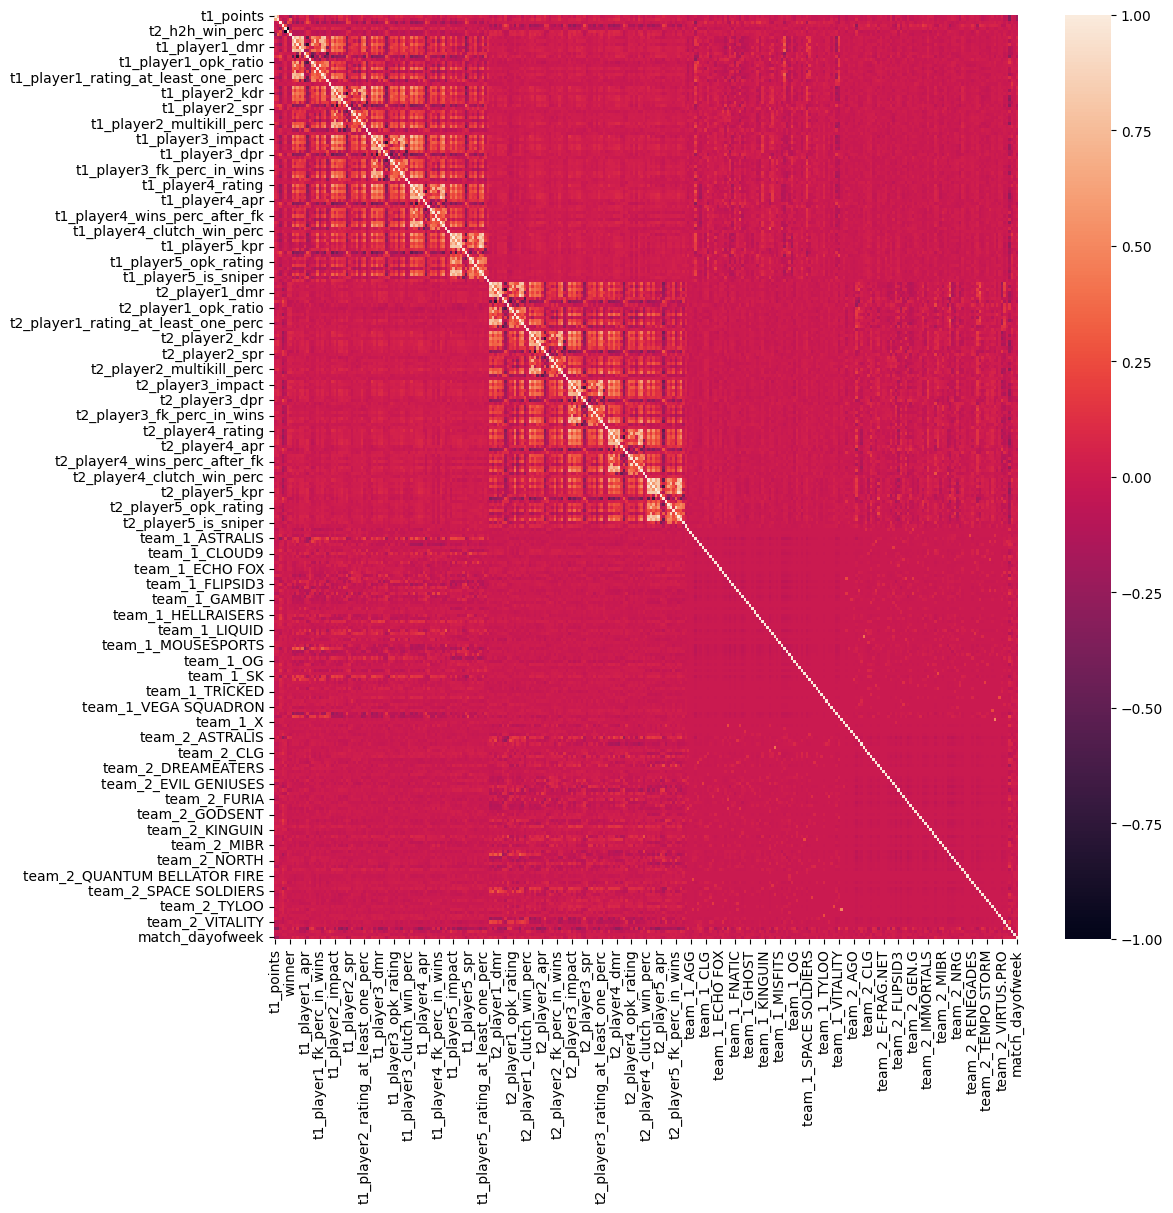

,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,t1_player1_rating,t1_player1_impact,t1_player1_kdr,...,team_2_VALIANCE,team_2_VEGA SQUADRON,team_2_VG.CYBERZEN,team_2_VIRTUS.PRO,team_2_VITALITY,team_2_WINDIGO,match_year,match_month,match_day,match_dayofweek
t1_points,1.000000,0.675230,-0.039732,-0.017611,0.016337,-0.016337,-0.282784,-0.023466,0.064508,-0.048809,...,-0.026494,0.017841,-0.018528,0.057918,-0.084721,-0.040108,-0.357717,0.003575,-0.023940,-0.199764
t2_points,0.675230,1.000000,0.061266,-0.097104,-0.068630,0.068630,0.315904,-0.098094,-0.003796,-0.111573,...,-0.006256,-0.000461,-0.013409,0.012890,-0.062979,-0.041747,-0.346807,-0.002911,-0.024723,-0.208938
t1_world_rank,-0.039732,0.061266,1.000000,0.081617,-0.239597,0.239597,0.137199,-0.210945,-0.087558,-0.281008,...,0.053171,0.006311,0.032692,0.008245,-0.025284,0.026744,-0.054173,0.016191,-0.013789,-0.020793
t2_world_rank,-0.017611,-0.097104,0.081617,1.000000,0.237277,-0.237277,-0.112191,0.013872,0.001425,0.002765,...,0.068937,0.058039,0.026521,-0.070414,-0.061286,0.041759,0.047517,-0.018492,0.019597,-0.019749
t1_h2h_win_perc,0.016337,-0.068630,-0.239597,0.237277,1.000000,-1.000000,-0.116134,0.119786,0.096800,0.112668,...,-0.017434,-0.019778,0.015839,0.015081,-0.012482,-0.006927,0.032673,-0.006366,0.019565,-0.000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
team_2_WINDIGO,-0.040108,-0.041747,0.026744,0.041759,-0.006927,0.006927,-0.016331,0.028412,0.013113,0.036165,...,-0.001980,-0.001565,-0.000699,-0.008337,-0.005320,1.000000,0.044526,-0.034974,0.029277,0.039121
match_year,-0.357717,-0.346807,-0.054173,0.047517,0.032673,-0.032673,-0.030907,0.106192,-0.097905,0.110793,...,0.047606,0.010085,-0.020108,-0.101551,0.167324,0.044526,1.000000,-0.018360,-0.014193,0.049789
match_month,0.003575,-0.002911,0.016191,-0.018492,-0.006366,0.006366,0.017598,0.018797,-0.014138,-0.016351,...,-0.035906,-0.061847,0.015523,-0.037759,-0.021355,-0.034974,-0.018360,1.000000,-0.103648,0.056047
match_day,-0.023940,-0.024723,-0.013789,0.019597,0.019565,-0.019565,-0.002508,-0.021201,0.003678,-0.013302,...,-0.006201,0.009209,0.024671,0.001266,0.010613,0.029277,-0.014193,-0.103648,1.000000,0.012891


In [76]:
draw_heatmap(df)
df.corr()

Так как признаков слишком много, чтобы выводить полную матрицу кореляции, оставим только значения где корреляция > 0.1

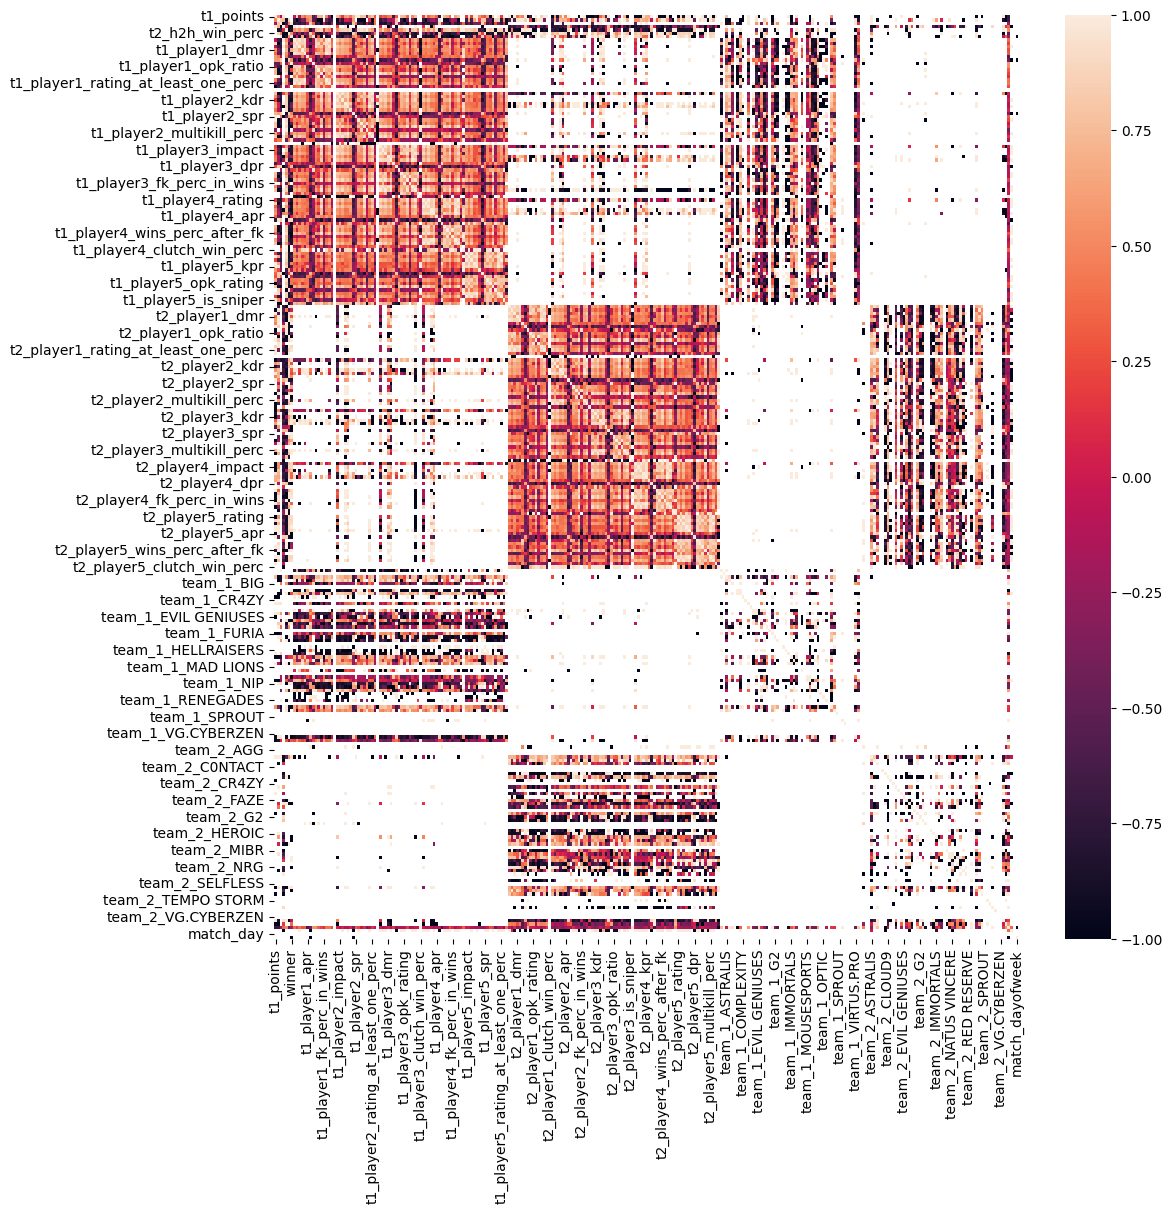

,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,t1_player1_rating,t1_player1_impact,t1_player1_kdr,...,team_2_TYLOO,team_2_VALIANCE,team_2_VEGA SQUADRON,team_2_VG.CYBERZEN,team_2_VIRTUS.PRO,team_2_VITALITY,match_year,match_month,match_day,match_dayofweek
t1_points,NaN,0.675230,NaN,NaN,NaN,NaN,-0.282784,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.357717,NaN,NaN,-0.199764
t2_points,0.675230,NaN,NaN,NaN,NaN,NaN,0.315904,NaN,NaN,-0.111573,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.346807,NaN,NaN,-0.208938
t1_world_rank,NaN,NaN,NaN,NaN,-0.239597,0.239597,0.137199,-0.210945,NaN,-0.281008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t2_world_rank,NaN,NaN,NaN,NaN,0.237277,-0.237277,-0.112191,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t1_h2h_win_perc,NaN,NaN,-0.239597,0.237277,NaN,-1.000000,-0.116134,0.119786,NaN,0.112668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
team_2_VITALITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.167324,NaN,NaN,NaN
match_year,-0.357717,-0.346807,NaN,NaN,NaN,NaN,NaN,0.106192,NaN,0.110793,...,NaN,NaN,NaN,NaN,-0.101551,0.167324,NaN,NaN,NaN,NaN
match_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.103648,NaN
match_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.103648,NaN,NaN


In [77]:
res = (
    df.corr()
    .where(lambda x: (abs(x) > 0.1) & (abs(x) != 1.0))
    .dropna(axis=1, how="all")
    .dropna(axis=0, how="all")
)
draw_heatmap(res)
res

Между параметрами одной команды есть сильная кореляция.

Между параметрами разных команд кореляция слабая.

### Выбор целевой переменной

Так как все параметры в датасете - метрики, вычисленные по итогу матча, то предсказывать по ним победу / поражение не имеет смысла.

Однако можно делать это, опираясь на исторические показатели и средние показатели команд.

Добавим новые переменные:

`diff_world_rank`: Разница в мировом рейтинге на начало матча
`diff_h2h_win_perc`: Историческое преимущество одной команды над другой.
`diff_avg_{metric}`: Средняя разница в метриках по командам.

В качестве целевой переменной будем считать "оценку" команды по показателям её игроков

In [78]:
# Агрегация статистики игроков по командам
metrics = ["rating", "impact", "kdr", "dmr", "kpr", "apr", "dpr", "spr"]

for team in ["t1", "t2"]:
    for metric in metrics:
        # Сбор всех столбцов для метрики
        cols = [f"{team}_player{i}_{metric}" for i in range(1, 6)]
        df[f"{team}_avg_{metric}"] = df[cols].mean(axis=1)
        df.drop(cols, axis=1, inplace=True)

# Создание признаков разницы между командами
for metric in metrics:
    df[f"diff_avg_{metric}"] = df[f"t1_avg_{metric}"] - df[f"t2_avg_{metric}"]

df["diff_world_rank"] = df["t1_world_rank"] - df["t2_world_rank"]
df["diff_h2h_win_perc"] = df["t1_h2h_win_perc"] - df["t2_h2h_win_perc"]

# Удаление исходных столбцов
df.drop(
    ["t1_world_rank", "t2_world_rank", "t1_h2h_win_perc", "t2_h2h_win_perc"],
    axis=1,
    inplace=True,
)

In [79]:
df

,t1_points,t2_points,winner,t1_player1_opk_ratio,t1_player1_opk_rating,t1_player1_wins_perc_after_fk,t1_player1_fk_perc_in_wins,t1_player1_multikill_perc,t1_player1_rating_at_least_one_perc,t1_player1_is_sniper,...,diff_avg_rating,diff_avg_impact,diff_avg_kdr,diff_avg_dmr,diff_avg_kpr,diff_avg_apr,diff_avg_dpr,diff_avg_spr,diff_world_rank,diff_h2h_win_perc
0,13,16,2,1.12,1.03,0.765,0.142,0.222018,0.783,False,...,0.044,0.044,0.056,1.08,0.018,0.012,-0.018,-0.002,-11,0.000000
1,17,19,2,1.67,1.17,0.780,0.181,0.193422,0.776,True,...,0.102,0.112,0.152,4.90,0.042,0.028,-0.052,-0.016,3,0.000000
2,16,3,1,1.13,1.27,0.700,0.236,0.213103,0.745,False,...,-0.074,-0.066,-0.116,-4.38,-0.040,-0.022,0.028,0.008,-1,0.000000
3,16,9,1,1.14,1.02,0.743,0.134,0.200414,0.774,False,...,0.060,0.064,0.090,2.02,0.018,0.014,-0.036,-0.012,-4,-0.166667
4,16,10,1,1.13,1.06,0.754,0.155,0.196871,0.756,True,...,0.052,0.052,0.052,1.80,0.020,0.022,-0.012,0.010,-16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,0,2,2,1.92,1.17,0.768,0.184,0.191829,0.786,True,...,-0.054,-0.088,-0.032,-3.48,-0.044,-0.014,-0.018,-0.044,2,0.000000
3783,10,16,2,1.74,1.21,0.740,0.183,0.182628,0.729,True,...,0.020,0.016,0.026,1.06,0.006,0.010,-0.008,-0.006,-2,-0.333333
3784,0,2,2,1.75,1.20,0.749,0.184,0.178008,0.729,True,...,-0.010,-0.006,-0.024,-0.92,-0.018,0.016,-0.004,0.010,3,0.714286
3785,0,2,2,1.54,1.17,0.739,0.193,0.193822,0.653,True,...,-0.084,-0.088,-0.126,-4.88,-0.044,-0.010,0.034,0.006,7,0.076923


## Разделение данных

### Split

In [80]:
target = "winner"
random_state = 42

In [81]:
for col in df.columns:
    corr = np.abs(df[target].corr(df[col]))
    if corr > 0.15:
        print(f'corr for {col} column: {corr}')

corr for t1_points column: 0.2827835402231906
corr for t2_points column: 0.315904223100528
corr for winner column: 1.0
corr for diff_avg_rating column: 0.18967737639720042
corr for diff_avg_impact column: 0.18172361617604318
corr for diff_avg_kdr column: 0.1973180602049918
corr for diff_avg_dmr column: 0.18241749314915162
corr for diff_avg_kpr column: 0.17840892462335317
corr for diff_avg_dpr column: 0.1895403992612938
corr for diff_world_rank column: 0.18390217975610557


In [82]:
X = df.drop(target, axis=1)
y = df[target]

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/val/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=random_state
)

In [83]:
X

,t1_points,t2_points,t1_player1_opk_ratio,t1_player1_opk_rating,t1_player1_wins_perc_after_fk,t1_player1_fk_perc_in_wins,t1_player1_multikill_perc,t1_player1_rating_at_least_one_perc,t1_player1_is_sniper,t1_player1_clutch_win_perc,...,diff_avg_rating,diff_avg_impact,diff_avg_kdr,diff_avg_dmr,diff_avg_kpr,diff_avg_apr,diff_avg_dpr,diff_avg_spr,diff_world_rank,diff_h2h_win_perc
0,13,16,1.12,1.03,0.765,0.142,0.222018,0.783,False,0.705882,...,0.044,0.044,0.056,1.08,0.018,0.012,-0.018,-0.002,-11,0.000000
1,17,19,1.67,1.17,0.780,0.181,0.193422,0.776,True,0.575000,...,0.102,0.112,0.152,4.90,0.042,0.028,-0.052,-0.016,3,0.000000
2,16,3,1.13,1.27,0.700,0.236,0.213103,0.745,False,0.521739,...,-0.074,-0.066,-0.116,-4.38,-0.040,-0.022,0.028,0.008,-1,0.000000
3,16,9,1.14,1.02,0.743,0.134,0.200414,0.774,False,0.657143,...,0.060,0.064,0.090,2.02,0.018,0.014,-0.036,-0.012,-4,-0.166667
4,16,10,1.13,1.06,0.754,0.155,0.196871,0.756,True,0.724138,...,0.052,0.052,0.052,1.80,0.020,0.022,-0.012,0.010,-16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,0,2,1.92,1.17,0.768,0.184,0.191829,0.786,True,0.733333,...,-0.054,-0.088,-0.032,-3.48,-0.044,-0.014,-0.018,-0.044,2,0.000000
3783,10,16,1.74,1.21,0.740,0.183,0.182628,0.729,True,0.560000,...,0.020,0.016,0.026,1.06,0.006,0.010,-0.008,-0.006,-2,-0.333333
3784,0,2,1.75,1.20,0.749,0.184,0.178008,0.729,True,0.625000,...,-0.010,-0.006,-0.024,-0.92,-0.018,0.016,-0.004,0.010,3,0.714286
3785,0,2,1.54,1.17,0.739,0.193,0.193822,0.653,True,0.571429,...,-0.084,-0.088,-0.126,-4.88,-0.044,-0.010,0.034,0.006,7,0.076923


In [84]:
X_scaled.shape

(3787, 242)

### Выбор признаков

In [85]:
y

0       2
1       2
2       1
3       1
4       1
       ..
3782    2
3783    2
3784    2
3785    2
3786    1
Name: winner, Length: 3787, dtype: int64

In [86]:
selector = SelectKBest(f_classif, k=50)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

In [87]:
X_train_selected

array([[-8.48823257e-01, -1.11518332e+00,  3.42993026e-01, ...,
        -6.47724023e-01,  2.64307628e-01,  2.10776139e+00],
       [ 1.18953671e+00,  1.90422378e-01,  1.66415111e+00, ...,
        -1.23195611e+00, -1.98260387e+00, -7.77154478e-02],
       [-8.48823257e-01, -9.70116016e-01, -6.17849220e-01, ...,
        -5.82809346e-01, -7.93062489e-01, -2.96263132e-01],
       ...,
       [ 1.70356729e-01,  1.20589347e+00, -1.00218612e+00, ...,
         3.90910798e-01, -3.49013109e-05,  2.71960846e-01],
       [-8.48823257e-01, -1.11518332e+00, -9.06101894e-01, ...,
        -1.16704143e+00, -3.49013109e-05, -8.06207727e-01],
       [-8.48823257e-01, -1.11518332e+00,  7.87614086e-02, ...,
         1.23480159e+00,  3.96478892e-01, -2.26319229e+00]])

# 2. Реализация и обучение базовой RBF

### Funcs init

In [88]:
# 1. Исправленная архитектура RBF-сети
class RBFLayer(torch.nn.Module):
    def __init__(self, in_features, num_centers, kernel="gaussian"):
        super().__init__()
        self.num_centers = num_centers
        self.kernel = kernel
        self.centers = torch.nn.Parameter(torch.randn(num_centers, in_features))
        self.sigmas = torch.nn.Parameter(torch.ones(num_centers))

    def forward(self, x):
        distances = torch.cdist(x, self.centers)
        if self.kernel == "gaussian":
            outputs = torch.exp(-0.5 * (distances / self.sigmas) ** 2)
        elif self.kernel == "multiquadric":
            outputs = torch.sqrt(distances**2 + self.sigmas**2)
        elif self.kernel == "inverse_quadratic":
            outputs = 1.0 / (1.0 + (distances / self.sigmas) ** 2)
        else:
            raise ValueError(f"Unsupported kernel: {self.kernel}")
        return outputs


class RBFNet(torch.nn.Module):
    def __init__(self, in_features, num_centers, kernel, num_classes=3):
        super().__init__()
        self.rbf = RBFLayer(in_features, num_centers, kernel)
        self.linear = torch.nn.Linear(num_centers, num_classes)

    def forward(self, x):
        x = self.rbf(x)
        x = self.linear(x)
        return x  # Размерность [batch_size, num_classes]


# 2. Функция создания модели с исправленной инициализацией
def create_rbf_model(rbf_type, init_method, X_train_np, num_centers=20):
    model = RBFNet(
        in_features=X_train_np.shape[1], num_centers=num_centers, kernel=rbf_type
    )

    if init_method == "kmeans":
        kmeans = KMeans(n_clusters=num_centers)
        kmeans.fit(X_train_np)
        model.rbf.centers.data = torch.tensor(
            kmeans.cluster_centers_, dtype=torch.float32
        )
        # Расчет сигм
        distances = kmeans.transform(X_train_np)
        sigma = np.mean(np.std(distances, axis=0))
        model.rbf.sigmas.data = torch.full_like(model.rbf.sigmas, sigma)
    elif init_method == "random":
        indices = np.random.choice(X_train_np.shape[0], num_centers, replace=False)
        model.rbf.centers.data = torch.tensor(X_train_np[indices], dtype=torch.float32)
        model.rbf.sigmas.data = torch.ones(num_centers)

    return model


# 3. Обучение градиентным спуском
def train_gradient_descent(model, X_train, y_train, epochs=100, lr=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()

    start_time = time.time()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    return time.time() - start_time


#! НЕ ПОДХОДИТ ДЛЯ МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ! И я понял это слишком поздно
def train_pseudo_inverse(model, X_train, y_train):
    start_time = time.time()

    # Вычисление RBF-активаций
    with torch.no_grad():
        rbf_outputs = model.rbf(X_train)

    # Псевдообратная матрица
    X = torch.cat([rbf_outputs, torch.ones(len(X_train), 1)], dim=1)  # Добавляем bias
    X_pinv = torch.linalg.pinv(X)
    weights = X_pinv @ y_train.reshape(-1, 1)

    # Установка весов
    model.linear.weight.data = weights[:-1].T
    model.linear.bias.data = weights[-1].flatten()

    return time.time() - start_time



def evaluate_model(model, X_val, y_val):
    with torch.no_grad():
        logits = model(X_val)
        preds = torch.argmax(logits, dim=1).numpy()
    return {
        "accuracy": accuracy_score(y_val, preds),
        "precision": precision_score(y_val, preds, average="macro"),
        "recall": recall_score(y_val, preds, average="macro"),
        "f1": f1_score(y_val, preds, average="macro"),
    }


In [89]:
X_train_tensor = torch.tensor(X_train_selected, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_selected, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_np = y_val.values  # Для метрик
X_test_tensor = torch.tensor(X_test_selected, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [90]:


results = []
for init_method in ["kmeans", "random"]:
    for rbf_type in ["gaussian", "multiquadric", "inverse_quadratic"]:

        # Создаем модель с передачей numpy данных для инициализации
        model = create_rbf_model(rbf_type, init_method, X_train_selected)  # numpy array

        # Обучение
        train_time = train_gradient_descent(model, X_train_tensor, y_train_tensor)

        # Оценка
        metrics = evaluate_model(model, X_val_tensor, y_val_np)

        results.append(
            {"init": init_method, "rbf": rbf_type, "time": train_time, **metrics}
        )

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="f1", ascending=False))

     init                rbf      time  accuracy  precision    recall  \
0  kmeans           gaussian  0.377733  0.707746   0.474119  0.472331   
3  random           gaussian  0.248813  0.697183   0.479799  0.463685   
1  kmeans       multiquadric  0.225694  0.681338   0.454313  0.456022   
2  kmeans  inverse_quadratic  0.246060  0.625000   0.416519  0.417841   
4  random       multiquadric  0.257943  0.610915   0.407339  0.408821   
5  random  inverse_quadratic  0.299435  0.589789   0.393063  0.393861   

         f1  
0  0.471187  
3  0.458694  
1  0.455024  
2  0.417133  
4  0.407975  
5  0.392972  


In [91]:
def print_grouped_metrics(group_by, metrics=["accuracy", "precision", "recall", "f1"]):
    grouped = results_df.groupby(group_by)

    mean_metrics = grouped.mean(numeric_only=True).reset_index()

    plt.figure(figsize=(14, 8))

    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, len(metrics), i)

        sns.barplot(data=mean_metrics, x=group_by, y=metric, palette="viridis")

        plt.title(f"сравнение {metric}")
        plt.ylabel(metric.upper())

    plt.tight_layout()
    plt.show()

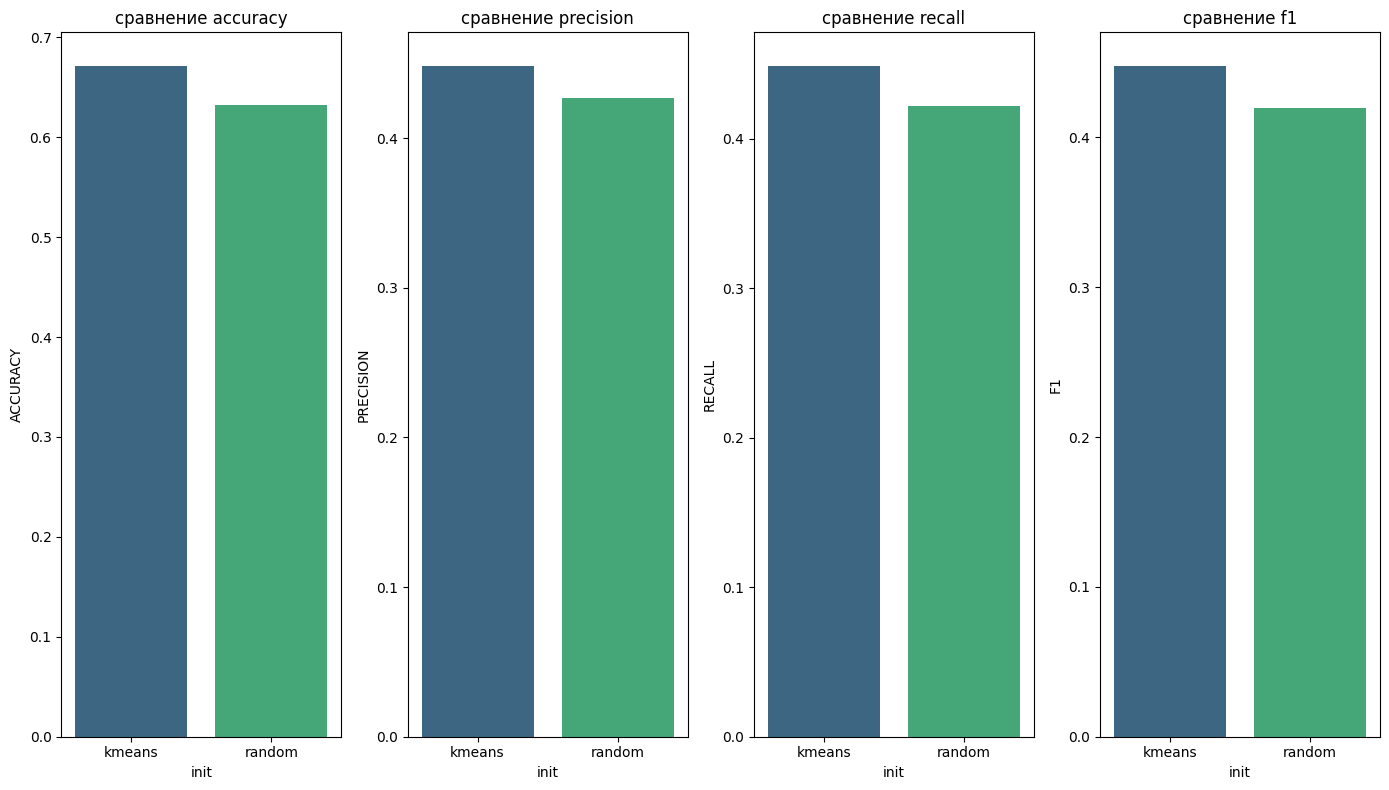

In [92]:
print_grouped_metrics('init')

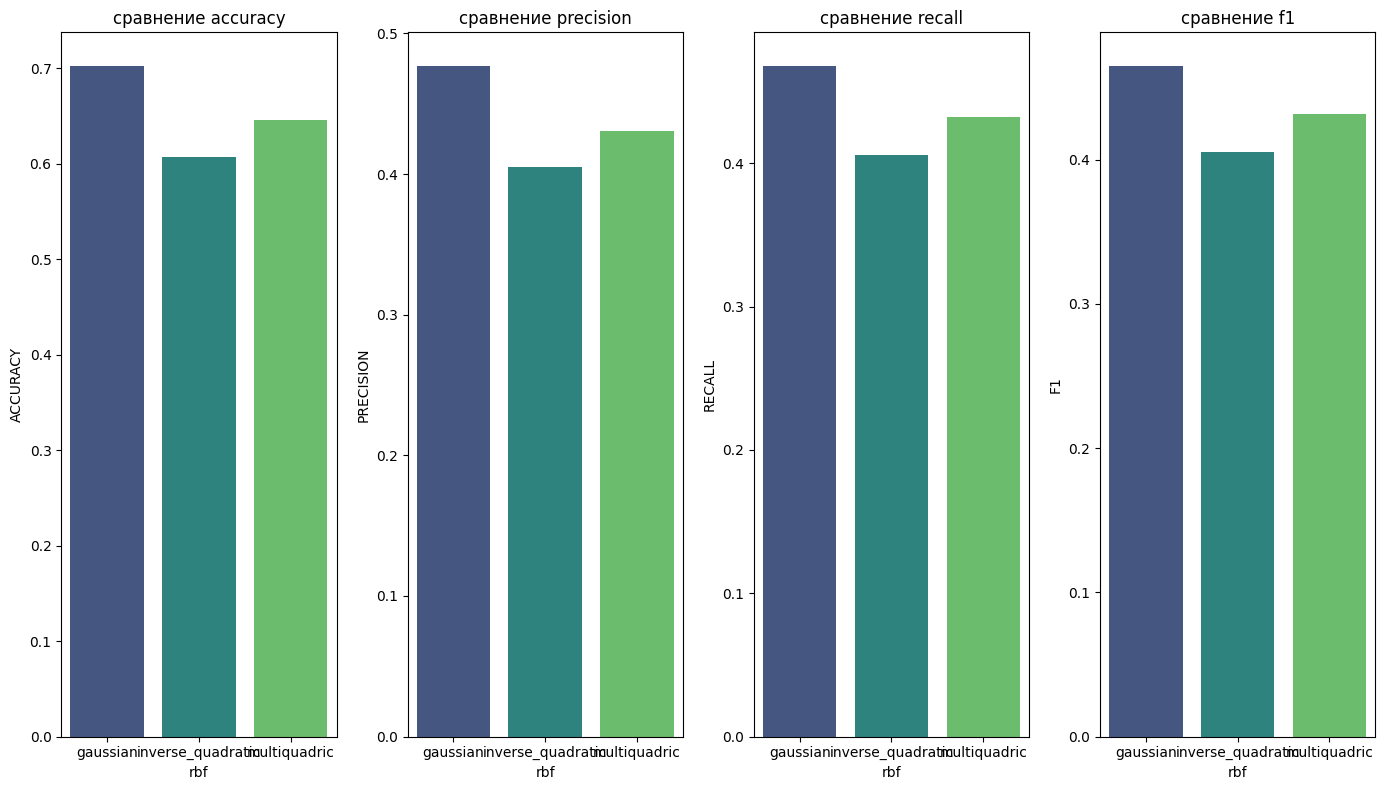

In [93]:
print_grouped_metrics('rbf')

In [94]:
best_model = create_rbf_model(
    rbf_type="inverse_quadratic", init_method="kmeans", X_train_np=X_train_tensor
)
train_gradient_descent(best_model, X_train_tensor, y_train_tensor, epochs=50)
test_metrics = evaluate_model(best_model, X_test_tensor, y_test_tensor)

In [95]:
print("Результаты на тестовых данных:")
print(pd.Series(test_metrics))

Результаты на тестовых данных:
accuracy     0.586995
precision    0.388684
recall       0.382561
f1           0.377363
dtype: float64


# 3. Проклятие размерности

In [96]:
# 1. Исследование зависимости от числа признаков
feature_counts = list(range(5, 242, 5))
results_features = {
    'n_features': [],
    'accuracy': [],
    'f1': [],
    'time': []
}

# Фиксируем количество центров
NUM_CENTERS = 20

for n_features in feature_counts:
    print(f"Processing {n_features} features...")
    
    # Выбор признаков
    selector = SelectKBest(f_classif, k=n_features)
    X_selected = selector.fit_transform(X, y)
    
    # Разделение данных
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_selected, y, 
        test_size=0.3,
        stratify=y,
        random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.5,
        stratify=y_temp,
        random_state=42
    )
    
    # Преобразование в тензоры
    X_train_tensor = torch.FloatTensor(X_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_train_tensor = torch.LongTensor(y_train.values)
    
    # Создание и обучение модели
    model = create_rbf_model(
        rbf_type='gaussian',
        init_method='kmeans',
        X_train_np=X_train,
        num_centers=NUM_CENTERS
    )
    
    train_time = train_gradient_descent(model, X_train_tensor, y_train_tensor)
    metrics = evaluate_model(model, X_val_tensor, y_val.values)
    
    # Сохранение результатов
    results_features['n_features'].append(n_features)
    results_features['accuracy'].append(metrics['accuracy'])
    results_features['f1'].append(metrics['f1'])
    results_features['time'].append(train_time)


Processing 5 features...
Processing 10 features...
Processing 15 features...
Processing 20 features...
Processing 25 features...
Processing 30 features...
Processing 35 features...
Processing 40 features...
Processing 45 features...
Processing 50 features...
Processing 55 features...
Processing 60 features...
Processing 65 features...
Processing 70 features...
Processing 75 features...
Processing 80 features...
Processing 85 features...
Processing 90 features...
Processing 95 features...
Processing 100 features...
Processing 105 features...
Processing 110 features...
Processing 115 features...
Processing 120 features...
Processing 125 features...
Processing 130 features...
Processing 135 features...
Processing 140 features...
Processing 145 features...
Processing 150 features...
Processing 155 features...
Processing 160 features...
Processing 165 features...
Processing 170 features...
Processing 175 features...
Processing 180 features...
Processing 185 features...
Processing 190 featur

In [97]:
df.shape

(3787, 243)

In [98]:

# 2. Исследование зависимости от числа центров
center_counts = list(range(5, 242, 5))
results_centers = {
    'n_centers': [],
    'accuracy': [],
    'f1': [],
    'time': []
}

# Фиксируем оптимальное количество признаков из предыдущего эксперимента
OPTIMAL_FEATURES = 50  # Можно изменить на найденное значение

# Выбор признаков
selector = SelectKBest(f_classif, k=OPTIMAL_FEATURES)
X_selected = selector.fit_transform(X, y)

# Разделение данных
X_train, X_temp, y_train, y_temp = train_test_split(
    X_selected, y, 
    test_size=0.3,
    stratify=y,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

# Преобразование в тензоры
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
y_train_tensor = torch.LongTensor(y_train.values)

for n_centers in center_counts:
    print(f"Processing {n_centers} centers...")
    
    # Создание и обучение модели
    model = create_rbf_model(
        rbf_type='gaussian',
        init_method='kmeans',
        X_train_np=X_train,
        num_centers=n_centers
    )
    
    train_time = train_gradient_descent(model, X_train_tensor, y_train_tensor)
    metrics = evaluate_model(model, X_val_tensor, y_val.values)
    
    # Сохранение результатов
    results_centers['n_centers'].append(n_centers)
    results_centers['accuracy'].append(metrics['accuracy'])
    results_centers['f1'].append(metrics['f1'])
    results_centers['time'].append(train_time)


Processing 5 centers...
Processing 10 centers...
Processing 15 centers...
Processing 20 centers...
Processing 25 centers...
Processing 30 centers...
Processing 35 centers...
Processing 40 centers...
Processing 45 centers...
Processing 50 centers...
Processing 55 centers...
Processing 60 centers...
Processing 65 centers...
Processing 70 centers...
Processing 75 centers...
Processing 80 centers...
Processing 85 centers...
Processing 90 centers...
Processing 95 centers...
Processing 100 centers...
Processing 105 centers...
Processing 110 centers...
Processing 115 centers...
Processing 120 centers...
Processing 125 centers...
Processing 130 centers...
Processing 135 centers...
Processing 140 centers...
Processing 145 centers...
Processing 150 centers...
Processing 155 centers...
Processing 160 centers...
Processing 165 centers...
Processing 170 centers...
Processing 175 centers...
Processing 180 centers...
Processing 185 centers...
Processing 190 centers...
Processing 195 centers...
Proces

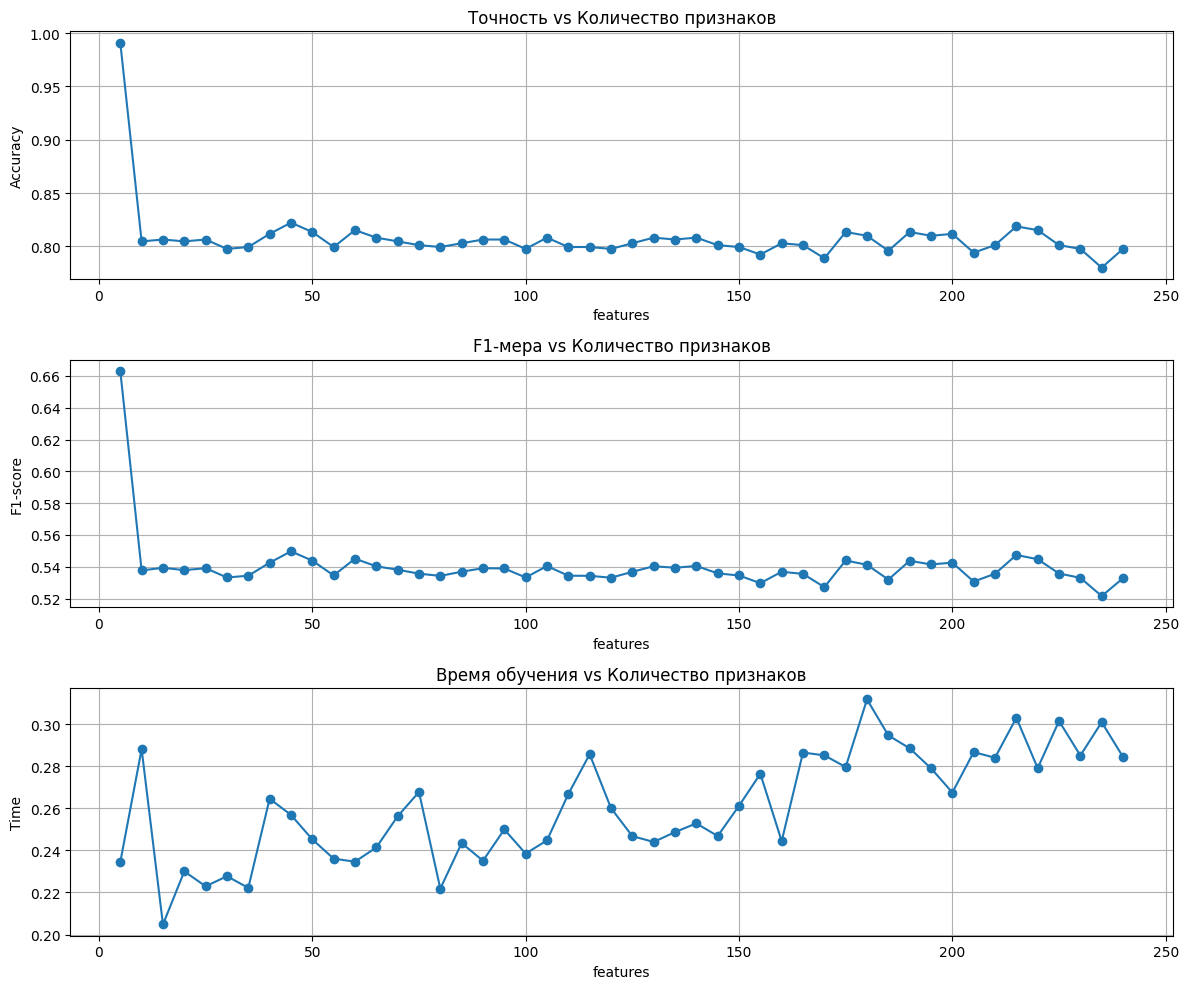

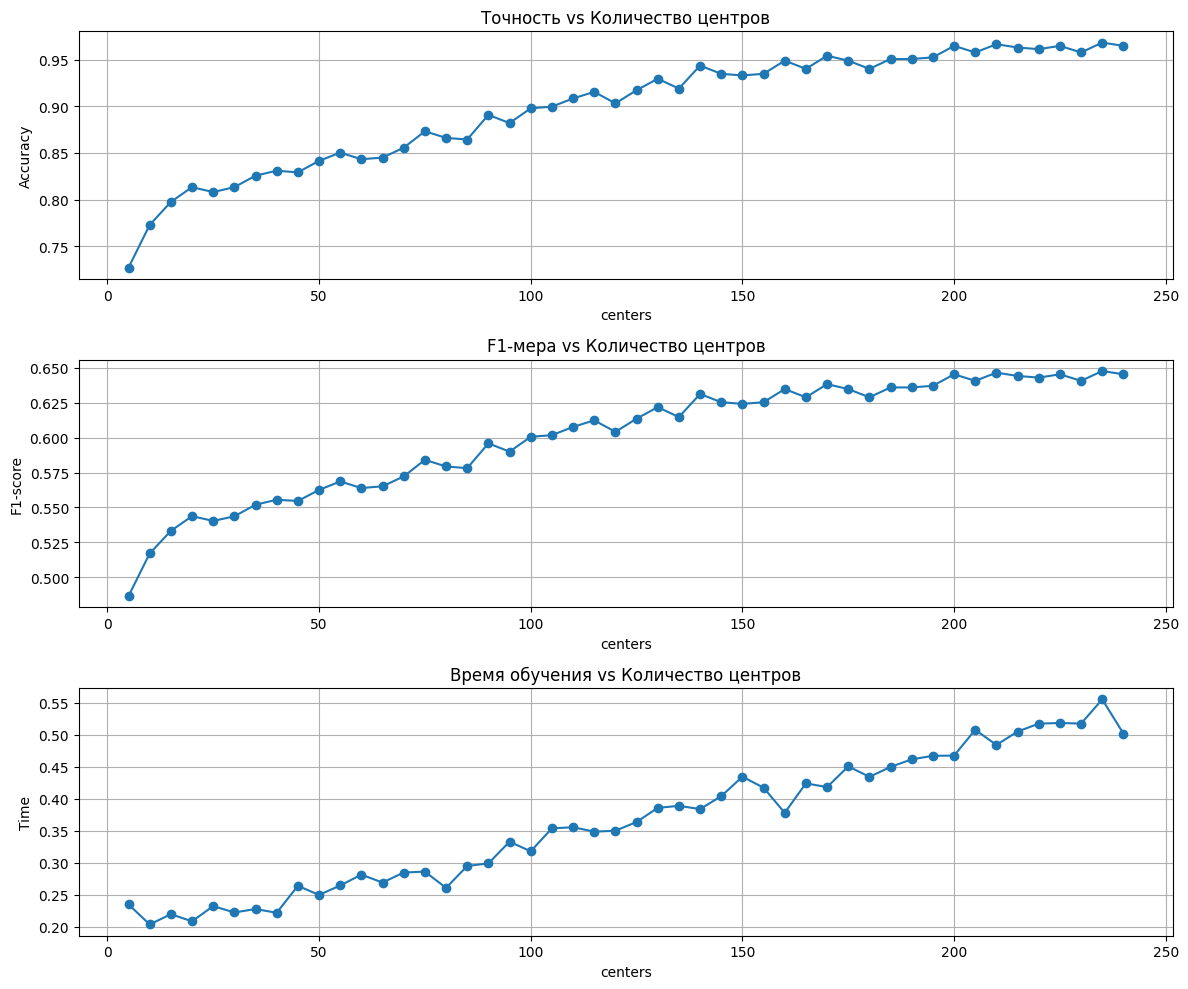

In [99]:

# 3. Визуализация результатов
def plot_results(results, x_label, title_suffix):
    plt.figure(figsize=(12, 10))
    
    metrics = ['accuracy', 'f1', 'time']
    titles = ['Точность', 'F1-мера', 'Время обучения']
    
    for i, metric in enumerate(metrics):
        plt.subplot(3, 1, i+1)
        plt.plot(results[f'n_{x_label}'], results[metric], marker='o')
        plt.title(f"{titles[i]} vs {title_suffix}")
        plt.xlabel(x_label)
        plt.ylabel(metric.capitalize() if metric != 'f1' else 'F1-score')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_results(results_features, 'features', 'Количество признаков')
plot_results(results_centers, 'centers', 'Количество центров')

# 4. Оптимизация модели

## Гибридная модель

Epoch 10/100
Train Loss: 0.0670
Val Acc: 0.9930  Val F1: 0.6643

Epoch 20/100
Train Loss: 0.0379
Val Acc: 0.9930  Val F1: 0.6643

Epoch 30/100
Train Loss: 0.0331
Val Acc: 0.9930  Val F1: 0.6644

Epoch 40/100
Train Loss: 0.0375
Val Acc: 0.9930  Val F1: 0.6643

Epoch 50/100
Train Loss: 0.0280
Val Acc: 0.9930  Val F1: 0.6643

Epoch 60/100
Train Loss: 0.0270
Val Acc: 0.9930  Val F1: 0.6644

Epoch 70/100
Train Loss: 0.0287
Val Acc: 0.9930  Val F1: 0.6643

Epoch 80/100
Train Loss: 0.0267
Val Acc: 0.9930  Val F1: 0.6643

Epoch 90/100
Train Loss: 0.0274
Val Acc: 0.9930  Val F1: 0.6643

Epoch 100/100
Train Loss: 0.0262
Val Acc: 0.9930  Val F1: 0.6643



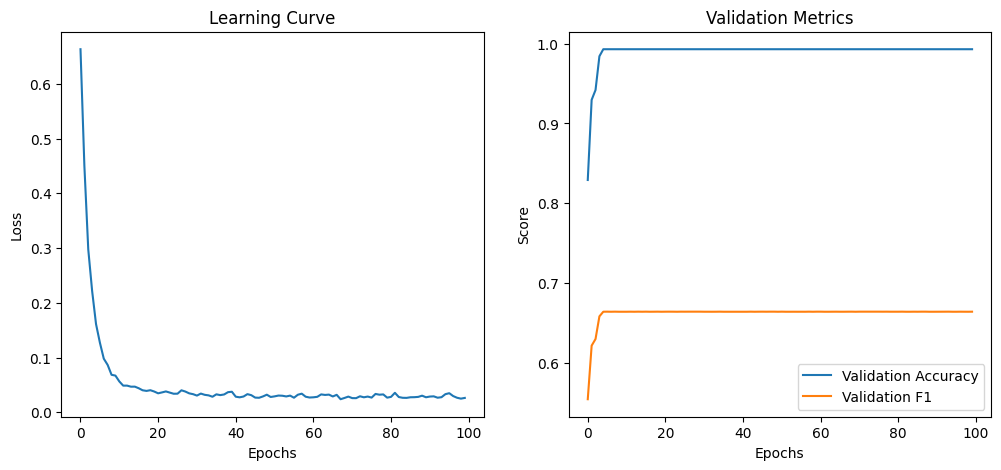


Test Results:
Accuracy: 0.4921
F1-Score: 0.3283


In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Гибридная модель RBF + MLP
class HybridRBFMLP(nn.Module):
    def __init__(self, input_size, num_centers, hidden_sizes, num_classes=3):
        super().__init__()
        
        # RBF слой с MiniBatch KMeans инициализацией
        self.rbf_centers = nn.Parameter(torch.Tensor(num_centers, input_size))
        self.rbf_sigmas = nn.Parameter(torch.ones(num_centers))
        self._init_rbf(X_train)  # Инициализация центров
        
        # MLP часть
        self.mlp = nn.Sequential(
            nn.Linear(num_centers + input_size, hidden_sizes[0]),
            nn.SiLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.SiLU(),
            nn.Linear(hidden_sizes[1], num_classes)
        )
        
    def _init_rbf(self, X):
        kmeans = MiniBatchKMeans(n_clusters=self.rbf_centers.shape[0], batch_size=1024)
        kmeans.fit(X.numpy() if isinstance(X, torch.Tensor) else X)
        self.rbf_centers.data = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)
        
        distances = kmeans.transform(X)
        self.rbf_sigmas.data = torch.tensor(np.mean(distances, axis=0), dtype=torch.float32)
        
    def rbf_layer(self, x):
        distances = torch.cdist(x, self.rbf_centers)
        return torch.exp(-(distances**2) / (2 * self.rbf_sigmas**2))
    
    def forward(self, x):
        rbf_out = self.rbf_layer(x)
        combined = torch.cat([rbf_out, x], dim=1)
        return self.mlp(combined)

# Функция обучения с оптимизацией
def train_model(model, X_train, y_train, X_val, y_val, 
               epochs=100, lr=0.001, batch_size=64, 
               l2_reg=0.001, verbose=True):
    
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2_reg)
    criterion = nn.CrossEntropyLoss()
    
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    history = {'train_loss': [], 'val_acc': [], 'val_f1': []}
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        # Валидация
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_preds = torch.argmax(val_outputs, dim=1)
            
        history['train_loss'].append(epoch_loss/len(train_loader))
        history['val_acc'].append(accuracy_score(y_val, val_preds))
        history['val_f1'].append(f1_score(y_val, val_preds, average='macro'))
        
        if verbose and (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}")
            print(f"Train Loss: {history['train_loss'][-1]:.4f}")
            print(f"Val Acc: {history['val_acc'][-1]:.4f}  Val F1: {history['val_f1'][-1]:.4f}\n")
    
    return history

input_size = X_train.shape[1]
model = HybridRBFMLP(
    input_size=input_size,
    num_centers=50,
    hidden_sizes=[128, 64],
    num_classes=3
)

history = train_model(
    model, 
    X_train_tensor, 
    y_train_tensor,
    X_val_tensor,
    y_val.to_numpy(),  # Преобразуем в numpy для метрик
    epochs=100,
    lr=0.001,
    batch_size=64,
    l2_reg=0.01
)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.plot(history['val_f1'], label='Validation F1')
plt.title('Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

# Оценка на тестовом наборе
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = torch.argmax(test_outputs, dim=1)
    
print("\nTest Results:")
print(f"Accuracy: {accuracy_score(y_test, test_preds):.4f}")
print(f"F1-Score: {f1_score(y_test, test_preds, average='macro'):.4f}")

In [121]:
import torch
import torch.nn as nn
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.utils.extmath import randomized_svd
import numpy as np

class MiniBatchRBFLayer(nn.Module):
    def __init__(self, num_centers, input_dim, batch_size=1024):
        super().__init__()
        self.num_centers = num_centers
        self.input_dim = input_dim
        self.batch_size = batch_size
        
        # Инициализация центров через MiniBatchKMeans
        self.centers = nn.Parameter(torch.Tensor(num_centers, input_dim), requires_grad=False)
        self.sigmas = nn.Parameter(torch.Tensor(num_centers))
        
    def initialize(self, X):
        """Инициализация центров и сигм на основе данных"""
        kmeans = MiniBatchKMeans(n_clusters=self.num_centers, 
                               batch_size=self.batch_size,
                               random_state=42)
        kmeans.fit(X.numpy() if isinstance(X, torch.Tensor) else X)
        
        # Установка центров
        self.centers.data = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)
        
        # Расчет сигм
        distances = kmeans.transform(X)
        avg_distances = np.mean(distances, axis=0)
        self.sigmas.data = torch.tensor(avg_distances / np.sqrt(2*self.num_centers), dtype=torch.float32)
    
    def forward(self, x):
        distances = torch.cdist(x, self.centers)
        return torch.exp(-(distances**2) / (2 * self.sigmas**2))

class KDRBFLayer(nn.Module):
    def __init__(self, num_centers, input_dim, k=5):
        super().__init__()
        self.num_centers = num_centers
        self.input_dim = input_dim
        self.k = k
        
        self.centers = nn.Parameter(torch.Tensor(num_centers, input_dim), requires_grad=False)
        self.sigmas = nn.Parameter(torch.Tensor(num_centers))
        self.kdtree = None
    
    def initialize(self, X):
        """Инициализация через KMeans и построение KD-дерева"""
        kmeans = KMeans(n_clusters=self.num_centers, random_state=42)
        kmeans.fit(X.numpy() if isinstance(X, torch.Tensor) else X)
        
        self.centers.data = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)
        self.kdtree = KDTree(kmeans.cluster_centers_)
        
        # Расчет сигм
        distances = kmeans.transform(X)
        avg_distances = np.mean(distances, axis=0)
        self.sigmas.data = torch.tensor(avg_distances / np.sqrt(2*self.num_centers), dtype=torch.float32)
    
    def forward(self, x):
        # Конвертация в numpy для работы с KDTree
        x_np = x.detach().to_numpy()
        
        # Поиск k ближайших центров
        _, indices = self.kdtree.query(x_np, k=self.k)
        
        # Создание маски
        batch_size = x.size(0)
        mask = torch.zeros(batch_size, self.num_centers)
        for i in range(batch_size):
            mask[i, indices[i]] = 1.0
        
        # Расчет RBF
        distances = torch.cdist(x, self.centers)
        rbf = torch.exp(-(distances**2) / (2 * self.sigmas**2))
        
        return rbf * mask

def train_pseudo_inverse_fast(model, X, y, n_components=None):
    """Обучение с рандомизированным SVD"""
    # Получение RBF признаков
    rbf_features = model.rbf_layer(X).detach().to_numpy()
    
    # Рандомизированный SVD
    if n_components is None:
        n_components = min(rbf_features.shape[1]//2, 100)
    
    U, s, Vt = randomized_svd(rbf_features, 
                             n_components=n_components,
                             random_state=42)
    
    # Псевдообратная матрица
    s_inv = np.zeros_like(s)
    s_inv[s > 1e-10] = 1/s[s > 1e-10]
    W = Vt.T @ np.diag(s_inv) @ U.T @ y.to_numpy().reshape(-1, 1)
    
    # Обновление весов выходного слоя
    with torch.no_grad():
        model.output_layer.weight.data = torch.tensor(W.T, dtype=torch.float32)
        model.output_layer.bias.data.zero_()
    
    return model

# Пример использования
class RBFNet(nn.Module):
    def __init__(self, input_dim, num_centers=50):
        super().__init__()
        self.rbf_layer = MiniBatchRBFLayer(num_centers, input_dim)
        self.output_layer = nn.Linear(num_centers, 1)
    
    def forward(self, x):
        x = self.rbf_layer(x)
        return self.output_layer(x)

# Инициализация и обучение
model = RBFNet(input_dim=X_train.shape[1])
model.rbf_layer.initialize(X_train)

# Быстрое обучение с SVD
model = train_pseudo_inverse_fast(model, X_train, y_train)

TypeError: cdist(): argument 'x1' (position 1) must be Tensor, not numpy.ndarray